In [2]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc

In [3]:
from lib import metrics

### Plot validation MAE

In [5]:
keep_phrases = ["val_mae"]

epochs = []
fcc_simple = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1107230603/info.log'
with open(fcc_simple) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
fcc_simple_res = []
for epoch in epochs:
    index = epoch.find("val_mae")
    fcc_simple_res.append(float(epoch[index+9 : index + 14]))

In [6]:
epochs = []
fcc_n2v = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108040246/info.log'
with open(fcc_n2v) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
fcc_n2v_res = []
for epoch in epochs:
    index = epoch.find("val_mae")
    fcc_n2v_res.append(float(epoch[index+9 : index + 14]))

In [110]:
epochs = []
dcrnn = '../DCRNN/data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108092636/info.log'
with open(dcrnn) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
dcrnn_res = []
for epoch in epochs:
    index = epoch.find("val_mae")
    dcrnn_res.append(float(epoch[index+9 : index + 14]))

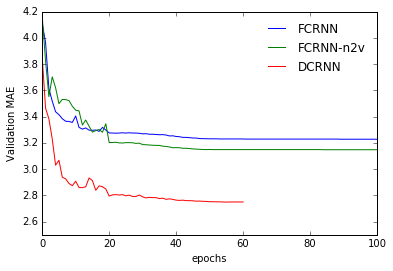

In [136]:
plt.figure(figsize=(6,4))
plt.plot(fcc_simple_res, label = 'FCRNN')
plt.plot(fcc_n2v_res, label = 'FCRNN-n2v')
plt.plot(dcrnn_res, label = 'DCRNN')
plt.ylabel(r'Validation MAE')
plt.xlabel(r'epochs')
plt.ylim(2.5, 4.2)
plt.legend(loc = 'best', frameon=False)
plt.show()

### Calculate test metrics

#### Create the predictions with trained model

Note, before running this commandline, you need to **comment out** Line 183 of *dcrnn_cell.py* 

In [ ]:
! python run_demo.py --config_filename './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1107230603/config_100.yaml' --output_filename 'fcrnn-simple.npz'

Note, before running this commandline, you need to **comment in** Line 183 of *dcrnn_cell.py* 

In [ ]:
! python run_demo.py --config_filename './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108040246/config_99.yaml' --output_filename 'fcrnn-n2v.npz'

#### Calculate the metrics
Actually the metrics are already calculate for us.

##### Without **node2vec**

2018-11-08 01:55:01,827 - model.dcrnn_supervisor - INFO - Horizon 01, MAE: 2.37, MAPE: 0.0580, RMSE: 4.19<br>
2018-11-08 01:55:01,922 - model.dcrnn_supervisor - INFO - Horizon 02, MAE: 2.73, MAPE: 0.0699, RMSE: 5.22<br>
**2018-11-08 01:55:02,024 - model.dcrnn_supervisor - INFO - Horizon 03, MAE: 2.99, MAPE: 0.0793, RMSE: 5.91**<br>
2018-11-08 01:55:02,113 - model.dcrnn_supervisor - INFO - Horizon 04, MAE: 3.21, MAPE: 0.0878, RMSE: 6.45<br>
2018-11-08 01:55:02,200 - model.dcrnn_supervisor - INFO - Horizon 05, MAE: 3.41, MAPE: 0.0954, RMSE: 6.90<br>
**2018-11-08 01:55:02,292 - model.dcrnn_supervisor - INFO - Horizon 06, MAE: 3.60, MAPE: 0.1026, RMSE: 7.30**<br>
2018-11-08 01:55:02,375 - model.dcrnn_supervisor - INFO - Horizon 07, MAE: 3.77, MAPE: 0.1094, RMSE: 7.66<br>
2018-11-08 01:55:02,460 - model.dcrnn_supervisor - INFO - Horizon 08, MAE: 3.93, MAPE: 0.1158, RMSE: 7.98<br>
2018-11-08 01:55:02,544 - model.dcrnn_supervisor - INFO - Horizon 09, MAE: 4.07, MAPE: 0.1218, RMSE: 8.26<br>
2018-11-08 01:55:02,629 - model.dcrnn_supervisor - INFO - Horizon 10, MAE: 4.21, MAPE: 0.1275, RMSE: 8.52<br>
2018-11-08 01:55:02,713 - model.dcrnn_supervisor - INFO - Horizon 11, MAE: 4.34, MAPE: 0.1329, RMSE: 8.76<br>
**2018-11-08 01:55:02,797 - model.dcrnn_supervisor - INFO - Horizon 12, MAE: 4.47, MAPE: 0.1383, RMSE: 8.99**<br>

##### With node2vec

2018-11-08 02:30:39,102 - model.dcrnn_supervisor - INFO - Horizon 01, MAE: 2.35, MAPE: 0.0575, RMSE: 4.16<br>
2018-11-08 02:30:39,183 - model.dcrnn_supervisor - INFO - Horizon 02, MAE: 2.69, MAPE: 0.0692, RMSE: 5.15<br>
**2018-11-08 02:30:39,262 - model.dcrnn_supervisor - INFO - Horizon 03, MAE: 2.94, MAPE: 0.0782, RMSE: 5.82**<br>
2018-11-08 02:30:39,342 - model.dcrnn_supervisor - INFO - Horizon 04, MAE: 3.15, MAPE: 0.0863, RMSE: 6.34<br>
2018-11-08 02:30:39,422 - model.dcrnn_supervisor - INFO - Horizon 05, MAE: 3.33, MAPE: 0.0934, RMSE: 6.77<br>
**2018-11-08 02:30:39,501 - model.dcrnn_supervisor - INFO - Horizon 06, MAE: 3.50, MAPE: 0.1001, RMSE: 7.14**<br>
2018-11-08 02:30:39,583 - model.dcrnn_supervisor - INFO - Horizon 07, MAE: 3.65, MAPE: 0.1063, RMSE: 7.48<br>
2018-11-08 02:30:39,663 - model.dcrnn_supervisor - INFO - Horizon 08, MAE: 3.78, MAPE: 0.1120, RMSE: 7.78<br>
2018-11-08 02:30:39,742 - model.dcrnn_supervisor - INFO - Horizon 09, MAE: 3.91, MAPE: 0.1172, RMSE: 8.03<br>
2018-11-08 02:30:39,821 - model.dcrnn_supervisor - INFO - Horizon 10, MAE: 4.02, MAPE: 0.1221, RMSE: 8.27<br>
2018-11-08 02:30:39,906 - model.dcrnn_supervisor - INFO - Horizon 11, MAE: 4.13, MAPE: 0.1267, RMSE: 8.49<br>
**2018-11-08 02:30:39,987 - model.dcrnn_supervisor - INFO - Horizon 12, MAE: 4.24, MAPE: 0.1311, RMSE: 8.70**<br>

**Worse than both DCRNN and GCRNN (difussion convolution with ChevNet)**

##### Plot error comparison

In [133]:
dcrnn = (2.77, 3.15, 3.60)
gcrnn = (2.80, 3.24, 3.81)
fcc_n2v = (2.94, 3.50, 4.24)
fcc = (2.99, 3.60, 4.47)

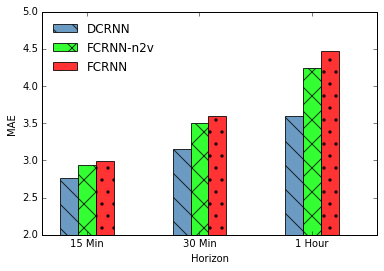

In [143]:
plt.figure(figsize=(6,4))
bar_width = 0.16
plt.bar(np.arange(3)+bar_width, dcrnn, bar_width, alpha = 0.8, label=r'DCRNN', color = 'steelblue', hatch='\\')
# plt.bar(np.arange(3)+2*bar_width, gcrnn, bar_width, alpha = 0.8, label=r'GCRNN', color = 'lavender', hatch='x')
plt.bar(np.arange(3)+2*bar_width, fcc_n2v, bar_width, alpha = 0.8, label=r'FCRNN-n2v', color = 'lime', hatch='x')
plt.bar(np.arange(3)+3*bar_width, fcc, bar_width, alpha = 0.8, label=r'FCRNN', color = 'red', hatch='.')
plt.xlim(0, 2.5+3*bar_width)
plt.ylim(2.0, 5)
plt.xlabel('Horizon')
plt.ylabel('MAE')
plt.xticks(np.arange(3) + 2.5*bar_width, ('15 Min', '30 Min', '1 Hour'))
plt.legend(loc = 'best', frameon=False)
plt.show()

Originally want to ask the following questions, but later found taht the metrics have already been calculated by the ***run_demo.py***.
+ Why there is so huge a discrepancy between Validation error and test error?
+ How did the author deal with the MAPE devision by 0?
<br>

In [145]:
fcrnn_simple = np.load('fcrnn-simple.npz')
assert fcrnn_simple['predictions'].shape == fcrnn_simple['groundtruth'].shape
print(fcrnn_simple['predictions'].shape)

fcrnn_n2v = np.load('fcrnn-n2v.npz')
assert fcrnn_n2v['predictions'].shape == fcrnn_n2v['groundtruth'].shape
print(fcrnn_n2v['predictions'].shape)

dcrnn = np.load('../DCRNN/dcrnn.npz')
assert dcrnn['predictions'].shape == dcrnn['groundtruth'].shape
print(dcrnn['predictions'].shape)

(12, 6850, 207)
(12, 6850, 207)
(12, 6850, 207)


### Plot a true data and its prediction

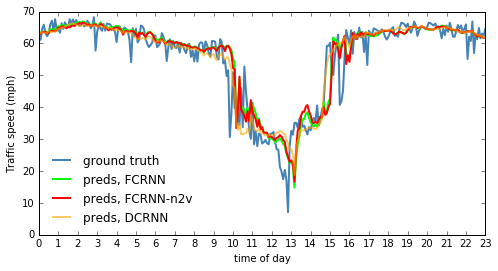

In [228]:
# 2012-03-14
plt.figure(figsize=(8, 4))
day = int(24*60/5)
start_time = 2*day
end_time = start_time + day
sensor = 6
plt.plot(fcrnn_n2v['groundtruth'][3,start_time:end_time, sensor], label = 'ground truth', color = 'steelblue',linewidth=2.0)
plt.plot(fcrnn_simple['predictions'][3,start_time:end_time, sensor], label = 'preds, FCRNN', color = 'lime', linewidth=2.0)
plt.plot(fcrnn_n2v['predictions'][3,start_time:end_time, sensor], label = 'preds, FCRNN-n2v', color = 'red',linewidth=2.0)
plt.plot(dcrnn['predictions'][3,start_time:end_time, sensor], label = 'preds, DCRNN', color = 'orange',linewidth=2.0, alpha=0.6)
plt.legend(loc = 'best', frameon=False)
plt.ylabel('Traffic speed (mph)')
plt.xticks(np.arange(0, 288, step=12), np.arange(0, 24))
plt.xlim(0, 23*12)
plt.xlabel('time of day')
plt.show()